# ProjectAI-DCNN

### Import libraries

In [1]:
import os

import matplotlib.pyplot as plt 
import numpy as np 

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
from torchvision.transforms import ToTensor
from torchvision import datasets
import torchvision.transforms.functional as TF

In [2]:
!git clone https://github.com/Sivaram46/ProjectAI-DCNN.git

os.chdir('ProjectAI-DCNN')
from DConv import DConv2d
from models import DCNN_Simple, DCNN_Medium
from train_test import train, test
from load_dataset import *

Cloning into 'ProjectAI-DCNN'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 24 (delta 10), reused 22 (delta 8), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [3]:
from google.colab import drive 
drive.mount('/drive/')

Mounted at /drive/


### Loaded dataset and analysed it

In [4]:
train_dataloader, test_dataloader, classes = load_cifar10(64)

for X, y in train_dataloader:
    print('\n\n', X.shape)
    print(y.shape)
    break


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


 torch.Size([64, 3, 32, 32])
torch.Size([64])


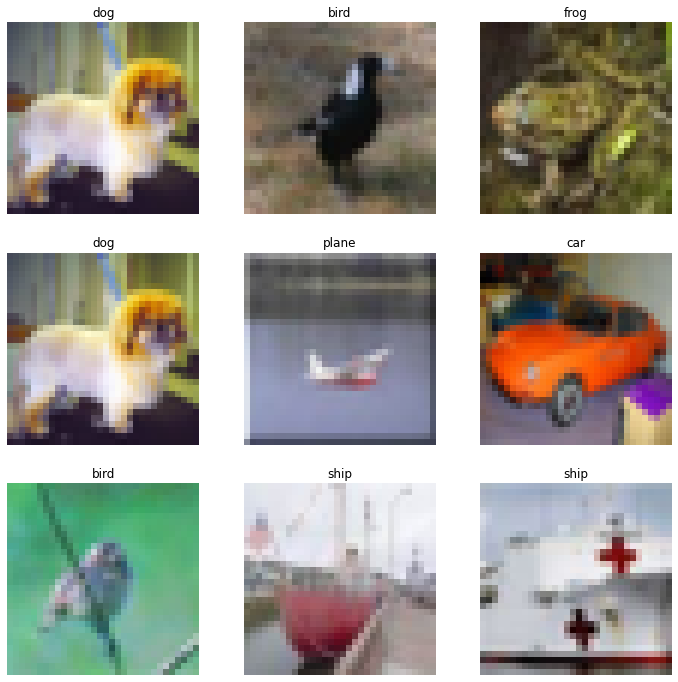

In [5]:
# Some random samples from dataset
dataiter = iter(train_dataloader)
images, labels = dataiter.next()

rand = np.random.choice(np.arange(64), 9)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i in range(9):
    img = torchvision.utils.make_grid(images[rand[i], ...])
    npimg = img.numpy()
    axs[i//3, i%3].set_title(classes[labels[rand[i]]])
    axs[i//3, i%3].imshow(np.transpose(npimg, (1, 2, 0)))
    axs[i//3, i%3].axis('off')

### DCNN Model

In [6]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(DEVICE))

model = DCNN_Simple(in_channels=3, n_class=10).to(DEVICE)
print("Learnable parameters: {:,}".format(model.n_params))

Using cuda device
Learnable parameters: 45,210


### Training Loop

In [7]:
EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loss, train_acc = [], []
test_loss, test_acc = [], []
for e in range(EPOCHS):
    print(f"Epoch {e + 1}\n" + '-' * 50)
    loss, acc = train(train_dataloader, model, loss_fn, optim)
    train_loss += loss; train_acc += acc

    loss, acc = test(test_dataloader, model, loss_fn)
    test_loss.append(loss); test_acc.append(acc)
    
print("Done!")

Epoch 1
--------------------------------------------------
[    0/50000] Loss: 2.297881	Accuracy: 14.1%
[ 6400/50000] Loss: 1.723867	Accuracy: 42.2%
[12800/50000] Loss: 1.577278	Accuracy: 46.9%
[19200/50000] Loss: 1.197448	Accuracy: 70.3%
[25600/50000] Loss: 1.232255	Accuracy: 60.9%
[32000/50000] Loss: 1.076653	Accuracy: 60.9%
[38400/50000] Loss: 1.077304	Accuracy: 60.9%
[44800/50000] Loss: 1.253936	Accuracy: 64.1%

Test Accuracy: 60.6%	 Test Loss: 0.017825 

Epoch 2
--------------------------------------------------
[    0/50000] Loss: 0.931250	Accuracy: 64.1%
[ 6400/50000] Loss: 0.998990	Accuracy: 57.8%
[12800/50000] Loss: 1.149099	Accuracy: 60.9%
[19200/50000] Loss: 1.058394	Accuracy: 65.6%
[25600/50000] Loss: 1.103825	Accuracy: 67.2%
[32000/50000] Loss: 1.154374	Accuracy: 62.5%
[38400/50000] Loss: 1.026270	Accuracy: 60.9%
[44800/50000] Loss: 0.777607	Accuracy: 70.3%

Test Accuracy: 63.2%	 Test Loss: 0.016689 

Epoch 3
--------------------------------------------------
[    0/50000]

In [8]:
print("Training Accuracy:\t{:.2f}%".format(train_acc[-1]))
print("Test Accuracy:\t\t{:.2f}%".format(test_acc[-1]))

Training Accuracy:	70.31%
Test Accuracy:		71.48%


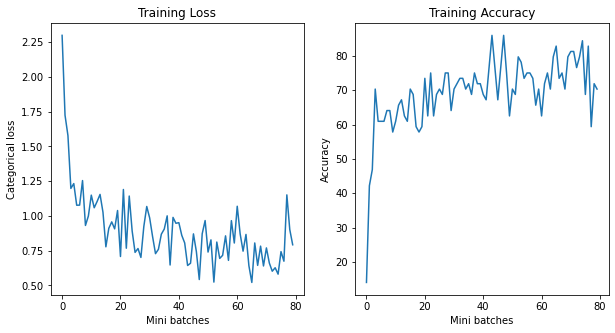

In [10]:
# Analyse the performance
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10, 5))

ax[0].plot(range(len(train_loss)), train_loss)
ax[0].set_title("Training Loss")
ax[0].set_xlabel('Mini batches')
ax[0].set_ylabel('Categorical loss')

ax[1].plot(range(len(train_acc)), train_acc)
ax[1].set_title("Training Accuracy")
ax[1].set_xlabel('Mini batches')
ax[1].set_ylabel('Accuracy')

plt.show()

### Save the model to drive

In [13]:
torch.save(model.state_dict(), '/drive/MyDrive/Package/dcnn_simple_cifar10.pth')
print("Model saved!!")

Model saved!!


In [14]:
model = DCNN_Medium(in_channels=3, n_class=10).to(DEVICE)
print("Learnable parameters: {:,}".format(model.n_params))

Learnable parameters: 18,091,722


In [15]:
EPOCHS = 10

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loss, train_acc = [], []
test_loss, test_acc = [], []
for e in range(EPOCHS):
    print(f"Epoch {e + 1}\n" + '-' * 50)
    loss, acc = train(train_dataloader, model, loss_fn, optim)
    train_loss += loss; train_acc += acc

    loss, acc = test(test_dataloader, model, loss_fn)
    test_loss.append(loss); test_acc.append(acc)
    
print("Done!")

Epoch 1
--------------------------------------------------
[    0/50000] Loss: 2.297576	Accuracy: 14.1%
[ 6400/50000] Loss: 1.784473	Accuracy: 34.4%
[12800/50000] Loss: 1.665235	Accuracy: 39.1%
[19200/50000] Loss: 1.266601	Accuracy: 53.1%
[25600/50000] Loss: 1.225680	Accuracy: 56.2%
[32000/50000] Loss: 1.432505	Accuracy: 54.7%
[38400/50000] Loss: 1.352949	Accuracy: 56.2%
[44800/50000] Loss: 1.223836	Accuracy: 45.3%

Test Accuracy: 58.1%	 Test Loss: 0.018396 

Epoch 2
--------------------------------------------------
[    0/50000] Loss: 1.032405	Accuracy: 57.8%
[ 6400/50000] Loss: 0.880527	Accuracy: 65.6%
[12800/50000] Loss: 1.179677	Accuracy: 53.1%
[19200/50000] Loss: 0.919400	Accuracy: 67.2%
[25600/50000] Loss: 0.813876	Accuracy: 68.8%
[32000/50000] Loss: 1.018192	Accuracy: 70.3%
[38400/50000] Loss: 0.969269	Accuracy: 68.8%
[44800/50000] Loss: 0.748852	Accuracy: 70.3%

Test Accuracy: 69.7%	 Test Loss: 0.013842 

Epoch 3
--------------------------------------------------
[    0/50000]

In [16]:
print("Training Accuracy:\t{:.2f}%".format(train_acc[-1]))
print("Test Accuracy:\t\t{:.2f}%".format(test_acc[-1]))

Training Accuracy:	82.81%
Test Accuracy:		77.12%


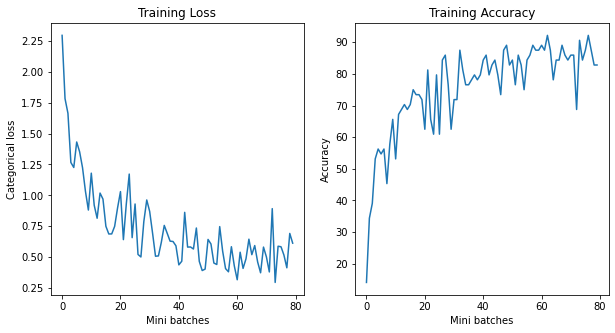

In [17]:
# Analyse the performance
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10, 5))

ax[0].plot(range(len(train_loss)), train_loss)
ax[0].set_title("Training Loss")
ax[0].set_xlabel('Mini batches')
ax[0].set_ylabel('Categorical loss')

ax[1].plot(range(len(train_acc)), train_acc)
ax[1].set_title("Training Accuracy")
ax[1].set_xlabel('Mini batches')
ax[1].set_ylabel('Accuracy')

plt.show()

In [18]:
torch.save(model.state_dict(), '/drive/MyDrive/Package/dcnn_medium_cifar10.pth')
print("Model saved!!")

Model saved!!
